In [ ]:
import os
import datetime

import IPython
import IPython.display
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import warnings



mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

Vamos a realizar un análisis de series temporales y una previsión de los productos vendidos por diferentes tiendas durante un periodo de 5 años.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/sales.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')

In [ ]:
df["month"] = df["date"].dt.month

In [ ]:
df.head()

,date,store,item,sales,month
0,2013-01-01,1,1,13,1
1,2013-01-02,1,1,11,1
2,2013-01-03,1,1,14,1
3,2013-01-04,1,1,13,1
4,2013-01-05,1,1,10,1


In [ ]:
df["year"] = df["date"].dt.year

In [ ]:
df.head()

,date,store,item,sales,month,year
0,2013-01-01,1,1,13,1,2013
1,2013-01-02,1,1,11,1,2013
2,2013-01-03,1,1,14,1,2013
3,2013-01-04,1,1,13,1,2013
4,2013-01-05,1,1,10,1,2013


Tenemos un buen dato de ventas de 5 años.

In [ ]:
df['year'].value_counts().sort_index()

2013    182500
2014    182500
2015    182500
2016    183000
2017    182500
Name: year, dtype: int64

In [ ]:
df['month'].value_counts().sort_index()

1     77500
2     70500
3     77500
4     75000
5     77500
6     75000
7     77500
8     77500
9     75000
10    77500
11    75000
12    77500
Name: month, dtype: int64

Ventas por año

In [ ]:
df.loc[(df["year"].between(2013, 2017))].groupby([pd.Grouper(key="year")])["sales"].mean()

year
2013    43.513660
2014    50.057436
2015    52.256915
2016    56.596503
2017    58.815014
Name: sales, dtype: float64

Pre procesamiento de los datos

In [ ]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
month    0
year     0
dtype: int64

In [ ]:
sales = df.groupby('date')['sales'].sum().reset_index()

In [ ]:
sales.head()

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237


Indexación con datos de series temporales

In [ ]:
sales = df.set_index('date')
sales.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

Nuestros datos actuales de fecha pueden ser difíciles de trabajar, por lo tanto, vamos a utilizar el valor de las ventas diarias promedio para ese mes en su lugar, y estamos utilizando el inicio de cada mes como la marca de tiempo.

In [ ]:
y = sales.resample('M').sum()

In [ ]:
y = y.drop(columns=['store', 'item', 'month', 'year'])

In [ ]:
y['2017':]

,sales
date,
2017-01-31,617306
2017-02-28,621369
2017-03-31,822667
2017-04-30,938862
2017-05-31,1020686
2017-06-30,1064624
2017-07-31,1171393
2017-08-31,1026403
2017-09-30,935263


Visualización de datos de series temporales de ventas de muebles

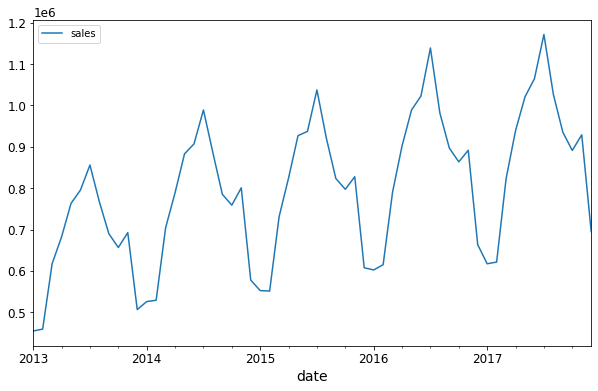

In [ ]:
y.plot(figsize=(10, 6))
plt.show()

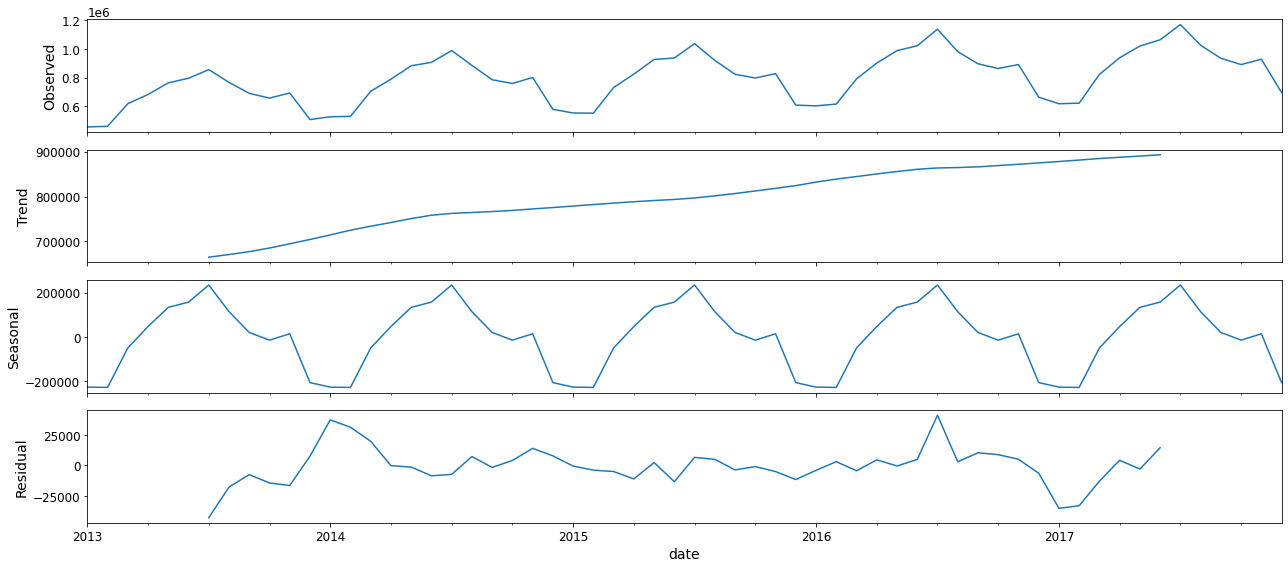

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Previsión de series temporales con ARIMA

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1775.9743967500065
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1386.892907514586


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1179.6266962860743
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1421.6836344879844
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1141.2214771727804
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1064.2900067414416
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:854.7922751569532


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1135.172871572709
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1708.3259911927769
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1448.87742851879
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1122.843561434729
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3034.734140953742
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1401.047179383438
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1436.328712301235
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:870.9635031485112
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2925.6421106471244
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1510.3936908291362
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1176.242730372044
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1029.82305344997


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1256.4899318122098
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1046.9035784828386
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1015.1085360834187
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:776.6169638221934


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1550.1901025401692
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1483.1490870580733
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1195.2054636583887
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1009.3959760989884


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1381.0585419306656
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1180.4604577690789
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1132.1774807627723
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:779.0428375318533


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:920.5718872071354
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1537.272756448575
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1197.9128350797616
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1051.775873231793


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1441.7574740000894
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1181.4030269627635
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1183.0847076934638
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:778.8719018887546


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1357.1099461570282
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1512.1625682905928
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1221.493803130833
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1032.020213938387


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1384.9550005559952
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1182.1518190713555
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1158.8557053062796
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:780.1194060362178


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1296.756926238368
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1509.6389019320704
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1171.459876694788
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1031.7443576236874


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1190.3839927001086
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1155.196759928882
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1156.8895534770577
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:756.8053685821748
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1425.2613444370272
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1484.1764307222322
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1148.4237809829076
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1006.2723725715733


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1228.7884175492711
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1157.393513994937
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1134.1121454406032
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:757.8185686357095
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1305.6105792036697


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0119         -0        inf      0.000      -1.012      -1.012
ma.L1          0.8282         -0       -inf      0.000       0.828       0.828
ar.S.L12      -0.1692   9.23e-28  -1.83e+26      0.000      -0.169      -0.169
ma.S.L12    1.212e+14   5.18e-33   2.34e+46      0.000    1.21e+14    1.21e+14
sigma2      1.218e-12    3.3e-10      0.004      0.997   -6.46e-10    6.49e-10


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py:2060: RuntimeWarning:

divide by zero encountered in true_divide



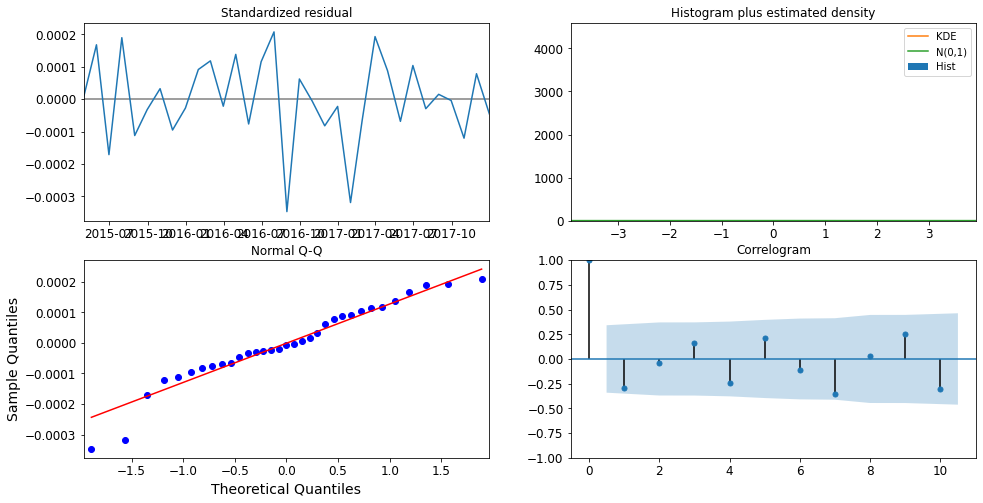

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Validating forecasts

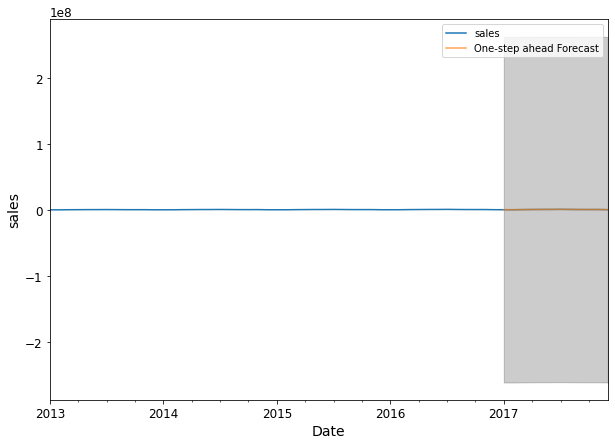

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:,1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('sales')
plt.legend()

plt.show()

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2017-01-31 00:00:00   NaN
2017-02-28 00:00:00   NaN
2017-03-31 00:00:00   NaN
2017-04-30 00:00:00   NaN
2017-05-31 00:00:00   NaN
2017-06-30 00:00:00   NaN
2017-07-31 00:00:00   NaN
2017-08-31 00:00:00   NaN
2017-09-30 00:00:00   NaN
2017-10-31 00:00:00   NaN
2017-11-30 00:00:00   NaN
2017-12-31 00:00:00   NaN
sales                 NaN
dtype: float64
